# Import Libraries and Modules

In [2]:
import sys
sys.path.append('./ml_model_comparison/src')

from regression_data_preprocessing import load_and_preprocess_regression_data
from model_random_forest_regressor import RandomForestRegressorModel
from model_svm_regressor import SVMRegressorModel
from model_linear_regression import LinearRegressionModel 

**Load and Preprocess Regression Data**

In [3]:
X, y = load_and_preprocess_regression_data("global air pollution dataset.csv")
X.head()
y.head()

0    51
1    41
2    66
3    34
4    22
Name: AQI Value, dtype: int64

**Split Data for Training and Testing**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize and Train Models


In [5]:
rf = RandomForestRegressorModel()
svm = SVMRegressorModel()
lr = LinearRegressionModel()

rf.train(X_train, y_train)
svm.train(X_train, y_train)
lr.train(X_train, y_train)

**Generate Model Predictions**

In [6]:
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Evaluate Regression Model Performance


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def print_regression_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Manual RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"{name} R² Score: {r2:.4f}\n")

print_regression_metrics("Random Forest Regressor", y_test, rf_pred)
print_regression_metrics("SVM Regressor", y_test, svm_pred)
print_regression_metrics("Linear Regression", y_test, lr_pred)

Random Forest Regressor Mean Absolute Error (MAE): 0.2228
Random Forest Regressor Root Mean Squared Error (RMSE): 2.8637
Random Forest Regressor R² Score: 0.9972

SVM Regressor Mean Absolute Error (MAE): 2.4850
SVM Regressor Root Mean Squared Error (RMSE): 16.1935
SVM Regressor R² Score: 0.9096

Linear Regression Mean Absolute Error (MAE): 4.6638
Linear Regression Root Mean Squared Error (RMSE): 8.4236
Linear Regression R² Score: 0.9755



# Visualize Regression Results Comparison


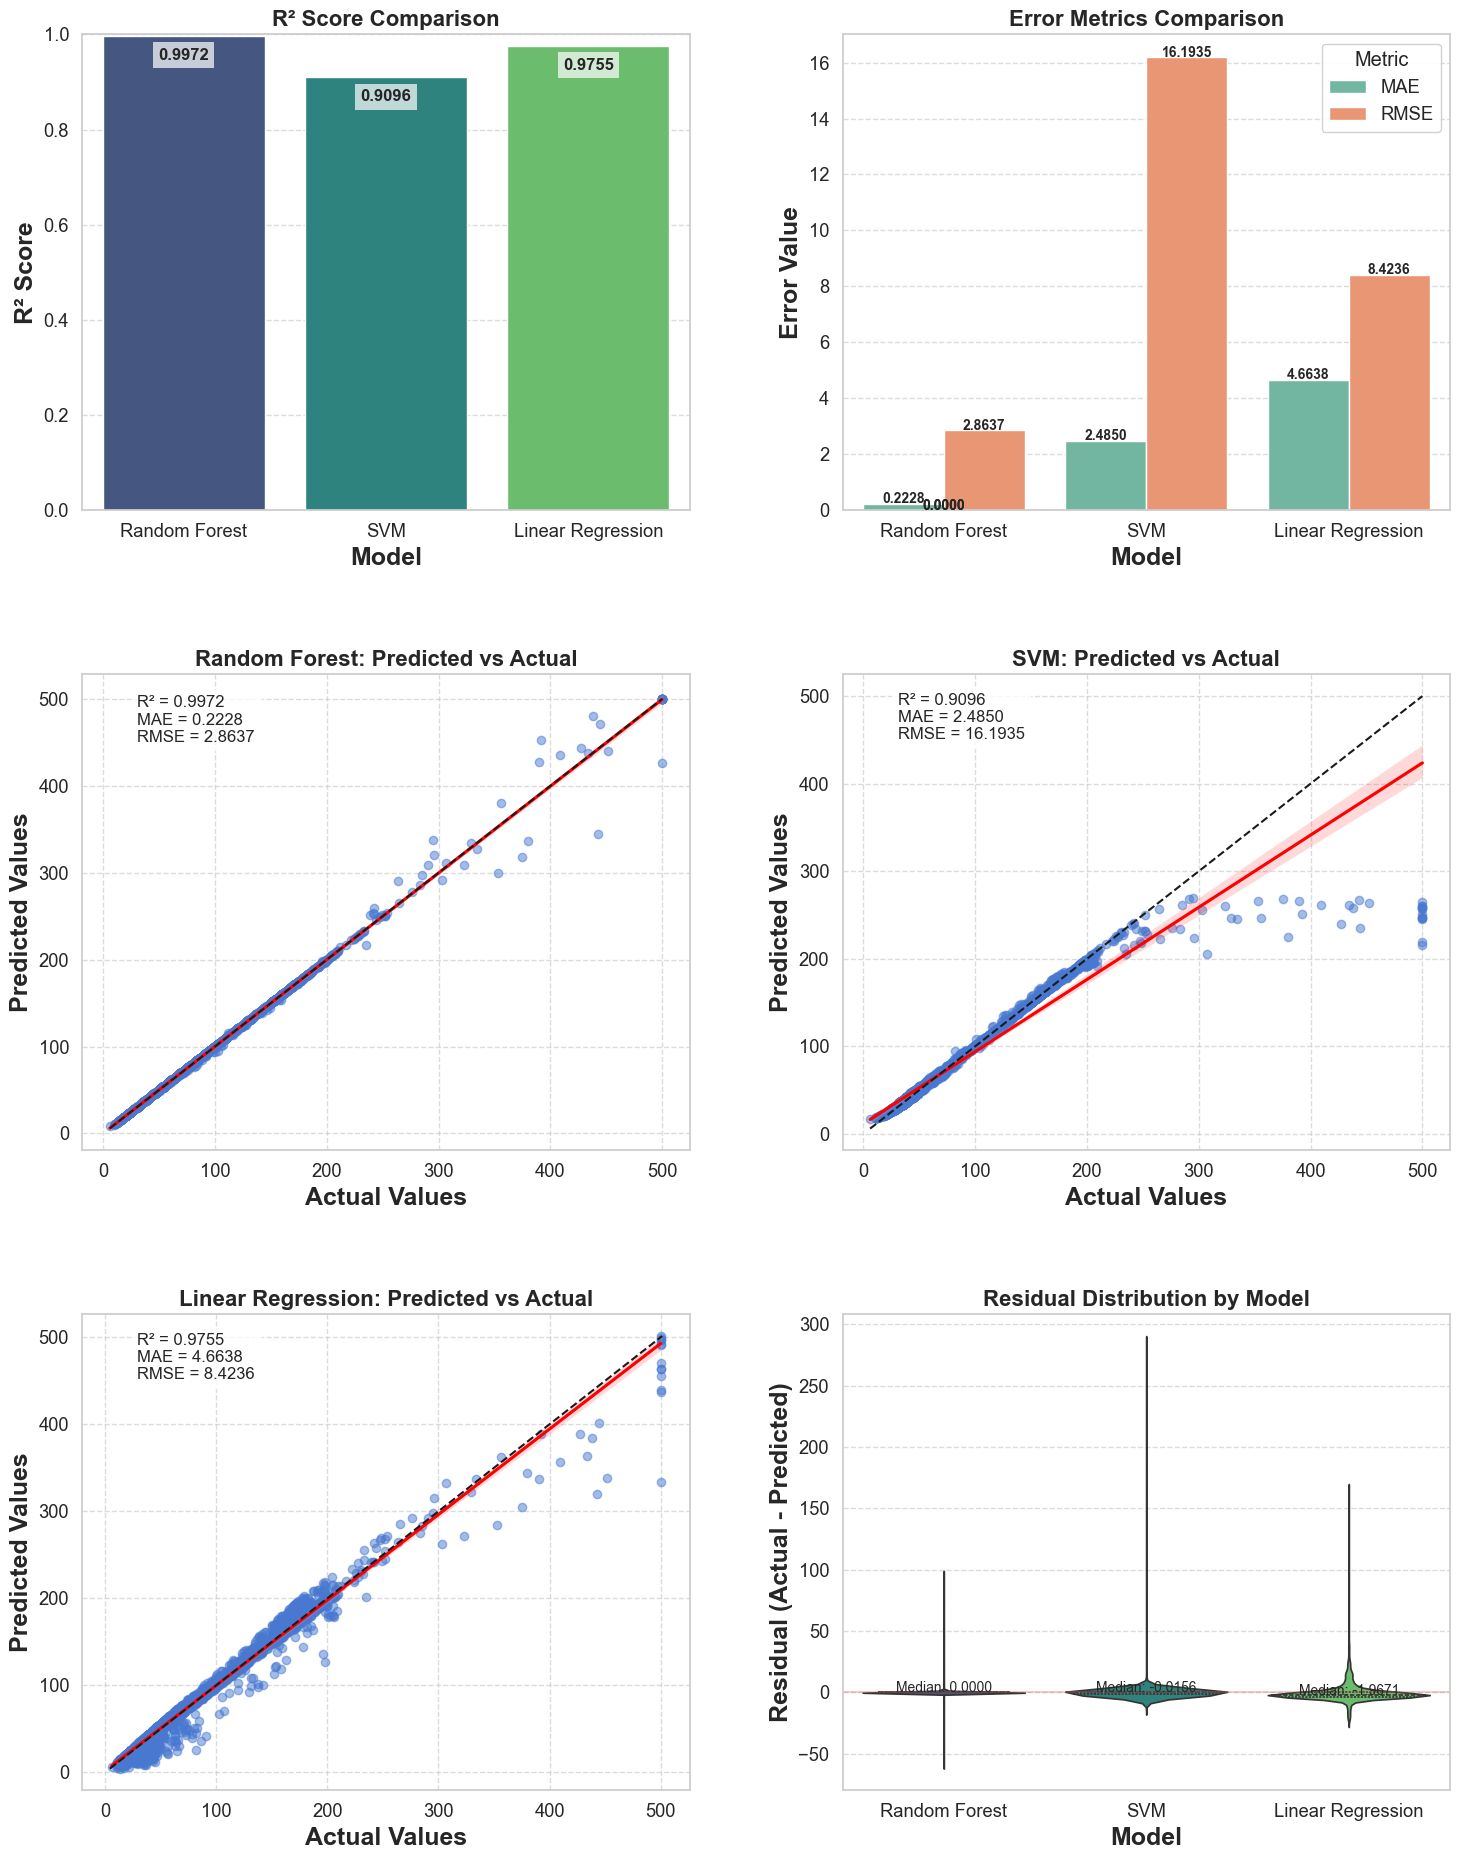

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Get predictions from existing models
reg_models = ['Random Forest', 'SVM', 'Linear Regression']
predictions = [rf_pred, svm_pred, lr_pred]

# Calculate regression metrics
r2_scores = [r2_score(y_test, pred) for pred in predictions]
mae_scores = [mean_absolute_error(y_test, pred) for pred in predictions]
rmse_scores = [np.sqrt(mean_squared_error(y_test, pred)) for pred in predictions]
mse_scores = [mean_squared_error(y_test, pred) for pred in predictions]
explained_var = [explained_variance_score(y_test, pred) for pred in predictions]

# Set style parameters
sns.set(style="whitegrid", font_scale=1.2, palette="muted")

# Create a figure with multiple plots
plt.figure(figsize=(16, 20))

label_fontdict = {'fontsize': 18, 'fontweight': 'bold'}

# 1. R² Score Comparison - Fix hue parameter warning
plt.subplot(3, 2, 1)
r2_df = pd.DataFrame({'Model': reg_models, 'R² Score': r2_scores})
sns.barplot(x='Model', y='R² Score', hue='Model', data=r2_df, palette='viridis', legend=False)
plt.title('R² Score Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', **label_fontdict)
plt.ylabel('R² Score', **label_fontdict)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(r2_scores):
    plt.text(i, max(0.01, score - 0.05), f'{score:.4f}', ha='center', fontsize=12, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.ylim(min(min(r2_scores) - 0.1, 0), 1.0)

# 2. Error Metrics Comparison
plt.subplot(3, 2, 2)
metrics_data = {
    'Model': reg_models * 2,
    'Metric': ['MAE'] * 3 + ['RMSE'] * 3,
    'Value': mae_scores + rmse_scores
}

metrics_df = pd.DataFrame(metrics_data)
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df, palette='Set2')
plt.title('Error Metrics Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', **label_fontdict)
plt.ylabel('Error Value', **label_fontdict)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', loc='upper right', frameon=True, framealpha=0.9)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.02, f'{height:.4f}', 
            ha="center", fontsize=10, fontweight='bold')

# 3. Prediction vs Actual Scatter Plots
for i, (model_name, pred) in enumerate(zip(reg_models, predictions)):
    plt.subplot(3, 2, i+3)
    sns.regplot(x=y_test, y=pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    min_val = min(min(y_test), min(pred))
    max_val = max(max(y_test), max(pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5)
    plt.title(f'{model_name}: Predicted vs Actual', fontsize=16, fontweight='bold')
    plt.xlabel('Actual Values', **label_fontdict)
    plt.ylabel('Predicted Values', **label_fontdict)
    plt.grid(linestyle='--', alpha=0.7)
    plt.text(min_val + 0.05*(max_val-min_val), max_val - 0.1*(max_val-min_val), 
             f'R² = {r2_scores[i]:.4f}\nMAE = {mae_scores[i]:.4f}\nRMSE = {rmse_scores[i]:.4f}', 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# 4. Residual Plot - Fix for data format
plt.subplot(3, 2, 6)
residual_data = []
model_names = []

for i, (model_name, pred) in enumerate(zip(reg_models, predictions)):
    residuals = y_test - pred
    for res in residuals:
        residual_data.append(res)
        model_names.append(model_name)

residual_df = pd.DataFrame({
    'Model': model_names,
    'Residual': residual_data
})

sns.violinplot(x='Model', y='Residual', hue='Model', data=residual_df, palette='viridis', inner='quartile', legend=False)
plt.title('Residual Distribution by Model', fontsize=16, fontweight='bold')
plt.xlabel('Model', **label_fontdict)
plt.ylabel('Residual (Actual - Predicted)', **label_fontdict)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

for i, model in enumerate(reg_models):
    median_val = np.median(residual_df[residual_df['Model'] == model]['Residual'])
    plt.text(i, median_val + 0.1, f'Median: {median_val:.4f}', ha='center', fontsize=10)

plt.tight_layout(pad=4.0)
plt.show()
